AS2019553

K-Nearest Neighbour algorithm model

In [756]:
#Importing packages
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

In [704]:
#read csv file
dataset = pd.read_csv('Mobile_Dataset.csv')

In [705]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [706]:
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [707]:
dataset.shape

(2000, 21)

In [708]:
#Checking whether NULL values are in dataset
pd.isnull(dataset).sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [709]:
#Since there are no nulls
#Data preprocessing
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [710]:
#Divide attibutes to input features and target class
y = dataset['price_range']
x = dataset.drop('price_range', axis = 1)

In [711]:
#Split dataset into 'training' and 'validation' datasets
x_trainingSet, x_validationSet, y_trainingSet, y_validationSet = train_test_split(x, y, test_size = 0.2, random_state = 103, stratify = y)

In [712]:
print(x_trainingSet.shape)
print(x_validationSet.shape)

(1600, 20)
(400, 20)


In [713]:
#Create KNN classifier and Fit the classifier to the data
knn_model = KNeighborsClassifier(n_neighbors = 3)  
knn_model.fit(x_trainingSet, y_trainingSet)

KNeighborsClassifier(n_neighbors=3)

In [714]:
#Predict targets of validation set 
y_knn_predict = knn_model.predict(x_validationSet) 

In [715]:
#Display Confusion Matrix
print(metrics.confusion_matrix(y_validationSet, y_knn_predict))

[[95  5  0  0]
 [ 3 94  3  0]
 [ 0  4 92  4]
 [ 0  0  7 93]]


In [716]:
#Check accuracy of model
print(accuracy_score(y_validationSet, y_knn_predict)) 

0.935


In [717]:
#Find best k value
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,30)}

grid_search_knn = GridSearchCV(knn, parameters, cv = 5)
grid_search_knn.fit(x_trainingSet, y_trainingSet)
grid_search_knn.best_params_

{'n_neighbors': 7}

In [718]:
#neighbors k = 7
knn_model = KNeighborsClassifier(n_neighbors = 7)  
knn_model.fit(x_trainingSet, y_trainingSet)  

KNeighborsClassifier(n_neighbors=7)

In [719]:
#Predict targets of validation set 
y_knn_predict = knn_model.predict(x_validationSet) 

In [720]:
#Display Confusion Matrix
print(metrics.confusion_matrix(y_validationSet, y_knn_predict))

[[97  3  0  0]
 [ 2 95  3  0]
 [ 0  4 91  5]
 [ 0  0  7 93]]


In [721]:
#Check accuracy of model
print(accuracy_score(y_validationSet, y_knn_predict)) 

0.94


Multi-layer neural network model

In [757]:
##read csv file
df = pd.read_csv('Mobile_Dataset.csv')

In [758]:
#Convert data into arrays
dset = df.values

In [759]:
#Assign first 20 columns as input features
X = dset[:,0:20]

In [760]:
#Assign last column as target
Y = dset[:,20]

In [761]:
#Scales the dataset so that all the input features lie between 0 and 1 inclusive
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [762]:
#Display array ‘X_scale’
X_scale

array([[0.22778891, 0.        , 0.68      , ..., 0.        , 0.        ,
        1.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [763]:
Y = df['price_range']

In [764]:
#Split dataset into 'training' and 'validation_and_test' datasets
X_training, X_validation_and_test, Y_training, Y_validation_and_test = train_test_split(X_scale, Y, test_size = 0.3 , random_state = 55)

In [765]:
X_validation_and_test

array([[0.1008684 , 1.        , 0.76      , ..., 1.        , 0.        ,
        0.        ],
       [0.21242485, 0.        , 0.04      , ..., 1.        , 0.        ,
        1.        ],
       [0.55377422, 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.18303273, 1.        , 0.84      , ..., 1.        , 0.        ,
        1.        ],
       [0.6259185 , 0.        , 0.68      , ..., 1.        , 1.        ,
        1.        ],
       [0.35604542, 0.        , 0.84      , ..., 1.        , 0.        ,
        0.        ]])

In [766]:
#Split 'validation_and_test' dataset into 'validation' and 'test' datasets
X_validation, X_test, Y_validation, Y_test = train_test_split(X_validation_and_test, Y_validation_and_test, test_size = 0.5)

In [767]:
print(X_training.shape, X_validation.shape, X_test.shape, Y_training.shape, Y_validation.shape, Y_test.shape)

(1400, 20) (300, 20) (300, 20) (1400,) (300,) (300,)


In [768]:
#Describe the architecture to Keras
#Import the necessary code from Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam

model = Sequential([
 Dense(32, activation = "relu", input_shape = (20,)),
 Dense(32,activation = 'relu'),
 Dense(4, activation = 'softmax')
])
#Configuring the model
model.compile(
   loss = SparseCategoricalCrossentropy(),
   optimizer = Adam(),
   metrics = "accuracy")

In [769]:
#Train for 100 epoches
model.fit(X_training,Y_training,epochs = 100)

Epoch 1/100
44/44 [==============================] - 2s 5ms/step - loss: 1.3695 - accuracy: 0.3129
Epoch 2/100
44/44 [==============================] - 0s 4ms/step - loss: 1.3087 - accuracy: 0.3964
Epoch 3/100
44/44 [==============================] - 0s 4ms/step - loss: 1.2170 - accuracy: 0.4671
Epoch 4/100
44/44 [==============================] - 0s 5ms/step - loss: 1.0828 - accuracy: 0.5686
Epoch 5/100
44/44 [==============================] - 0s 5ms/step - loss: 0.9397 - accuracy: 0.6443
Epoch 6/100
44/44 [==============================] - 0s 5ms/step - loss: 0.8146 - accuracy: 0.7107
Epoch 7/100
44/44 [==============================] - 0s 5ms/step - loss: 0.7208 - accuracy: 0.7721
Epoch 8/100
44/44 [==============================] - 0s 4ms/step - loss: 0.6426 - accuracy: 0.8057
Epoch 9/100
44/44 [==============================] - 0s 5ms/step - loss: 0.5786 - accuracy: 0.8257
Epoch 10/100
44/44 [==============================] - 0s 4ms/step - loss: 0.5222 - accuracy: 0.8443
Epoch 11/

In [770]:
#Find the accuracy on our test set
model.evaluate(X_test, Y_test)[1]

10/10 [==============================] - 0s 5ms/step - loss: 0.1562 - accuracy: 0.9300


0.9300000071525574

In [771]:
#Creates an array of predictions from a matrix of percentages of classifications
def predictionrelease(predictions):
    arr = []
    for i in range(0,len(predictions)):
        answer = np.argmax(predictions[i])
        arr.append(answer)
    len(arr)
    return arr

In [772]:
#Testing cross validation sets
predictions_test = model.predict(X_test)      
test_predictions = predictionrelease(predictions_test)

10/10 [==============================] - 0s 4ms/step


In [773]:
#Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,test_predictions)) 

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        62
           1       0.96      0.90      0.93        81
           2       0.88      0.95      0.91        74
           3       0.97      0.90      0.94        83

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



Comparing the accuracies of designed machine learning models

In [774]:
import matplotlib.pyplot as plt

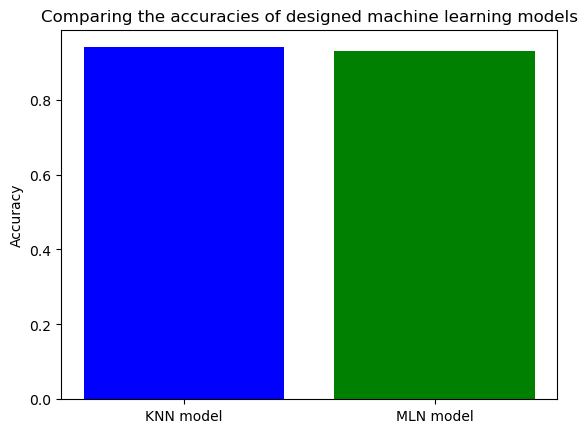

In [775]:
models_name = ['KNN model' , 'MLN model'] 
accuracy = [0.94, 0.930]

plt.bar(models_name, accuracy, color = ['blue', 'green']) 
plt.ylabel("Accuracy") 
plt.title("Comparing the accuracies of designed machine learning models") 
plt.show()